*问题*

1. 分子分母不一致处理，合理性待讨论。
2. 实际所用kde估计熵为 将kde所求的概率密度函数直接当作概率计算熵
3. 将熵进行了归一化

*尝试的计算方法*

----


### 1.均离散化

IG（信息增益）:在数值上等于互信息，采用离散化互信息代替

H(X)和H(Y) （信息熵）：离散化计算


##### 离散化方法 -- MDLP

过程：

![mdlp%E8%BF%87%E7%A8%8B.png](attachment:mdlp%E8%BF%87%E7%A8%8B.png)

***结果分析***：

1.程序运行结果上存在以下情况：

1）由于存在人工决定的阈值，数值离散化程度实际上有部分先验因素影响，从目前选定的阈值来看，离散化程度并不高，但应该如何调整仍待讨论

2）由于算法递归层数较深，在部分特征值上的离散化运行报错


2.关于离散化方法的讨论：

1）由于信息熵和互信息的性质，其数值大小对离散化程度敏感，离散化的方法对离散熵数值的影响是显著的

2）基于1）中提到的性质，想要用离散熵验证kde熵的想法无法通过直接比较熵的数值大小来实现

3）现阶段的想法是直接比较离散化计算的SU与kde方法计算的SU，但是由于之前提到的代码运行问题，可能要考虑简单的等宽离散等方法

...待补充

### 均KDE计算
> *《混合数据的核密度估计熵与快速的贪心特征选择算法》*
>> *张靖红*

##### KDE熵:根据连续随机变量的实例概率$\int_{x\in X}\hat{p}(x)dx=\frac{1}{n}$，推导如下公式

- 公式：
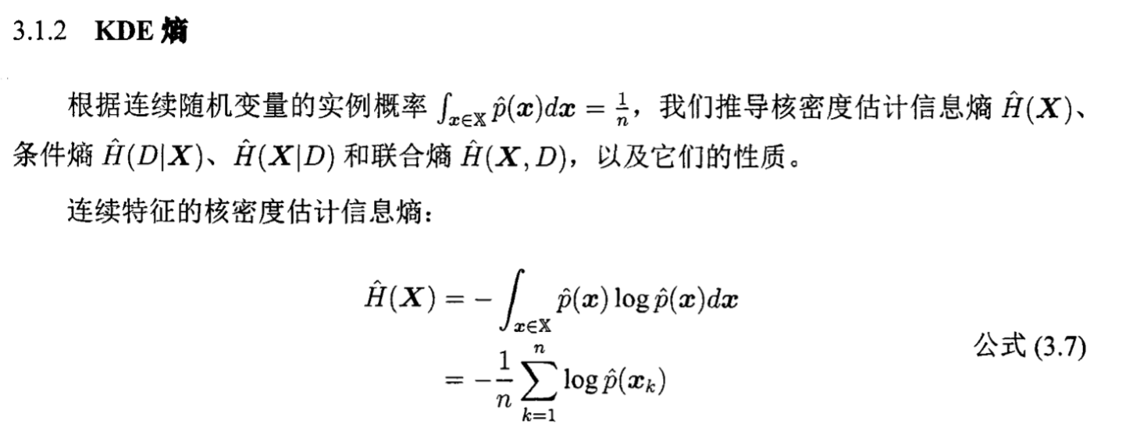


##### KDE条件熵

- 公式：
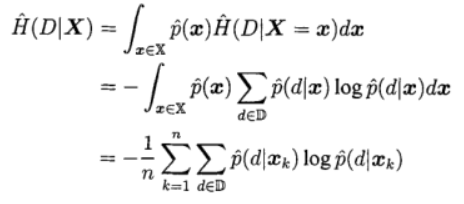

##### 分析：

1）论文给出的D为标签变量，即只给出了特征对于标签的信息增益计算方法，而特征之间的信息增益计算方法未涉及,此外，条件概率的kde计算方法同样是针对特征和标签间的。（区别：标签是严格的离散变量，而我们计算的特征是连续变量）

2）关于1）会导致的问题：如果直接将条件概率公式运用到特征间条件熵计算：$$p(c|x)=\frac{\sum_{i\in I_{c}}\phi(x-x_i,h)}{\sum_{k=1}^{N}\sum_{i\in I_{k}}\phi(x-x_i,h)}$$ 由于其计算方法本身的特点,我们需要对特征x按特征c的取值进行划分，分别对每一个划分段进行核密度估计，这样的划分对于取值数达到十万级别的连续型数据是不能接受的，同组内过小的数据量也会让kde失去意义

3）对于1）中的问题，我们尝试了两方面的解决方法：a.推导适用于连续特征间条件熵计算的公式 b.计算时，将对应标签特征的特征值离散化处理，这些处理方法又导致了新的问题，我们会对这两个方法做后续讨论：

##### 疑问：

1）连续随机变量的实例概率$\int_{x\in X}\hat{p}(x)dx=\frac{1}{n}$，这个公式是张[]的论文里根据Nojun Kwak[]里关于kde条件概率公式推导出的，并没有经过严格的证明，合理性尚且存疑，且后续的一些实验结果表明这个推导（或者近似计算）似乎并不正确

2）如果上述kde熵计算公式被确认不可靠，那么我们关于信息熵的计算方法似乎只剩下离散化一条路可选，这一点需要格外注意

----

#### 尝试方法1.KDE条件熵H(X|Y)（两特征间）的尝试推导

两个推导：

- 1:

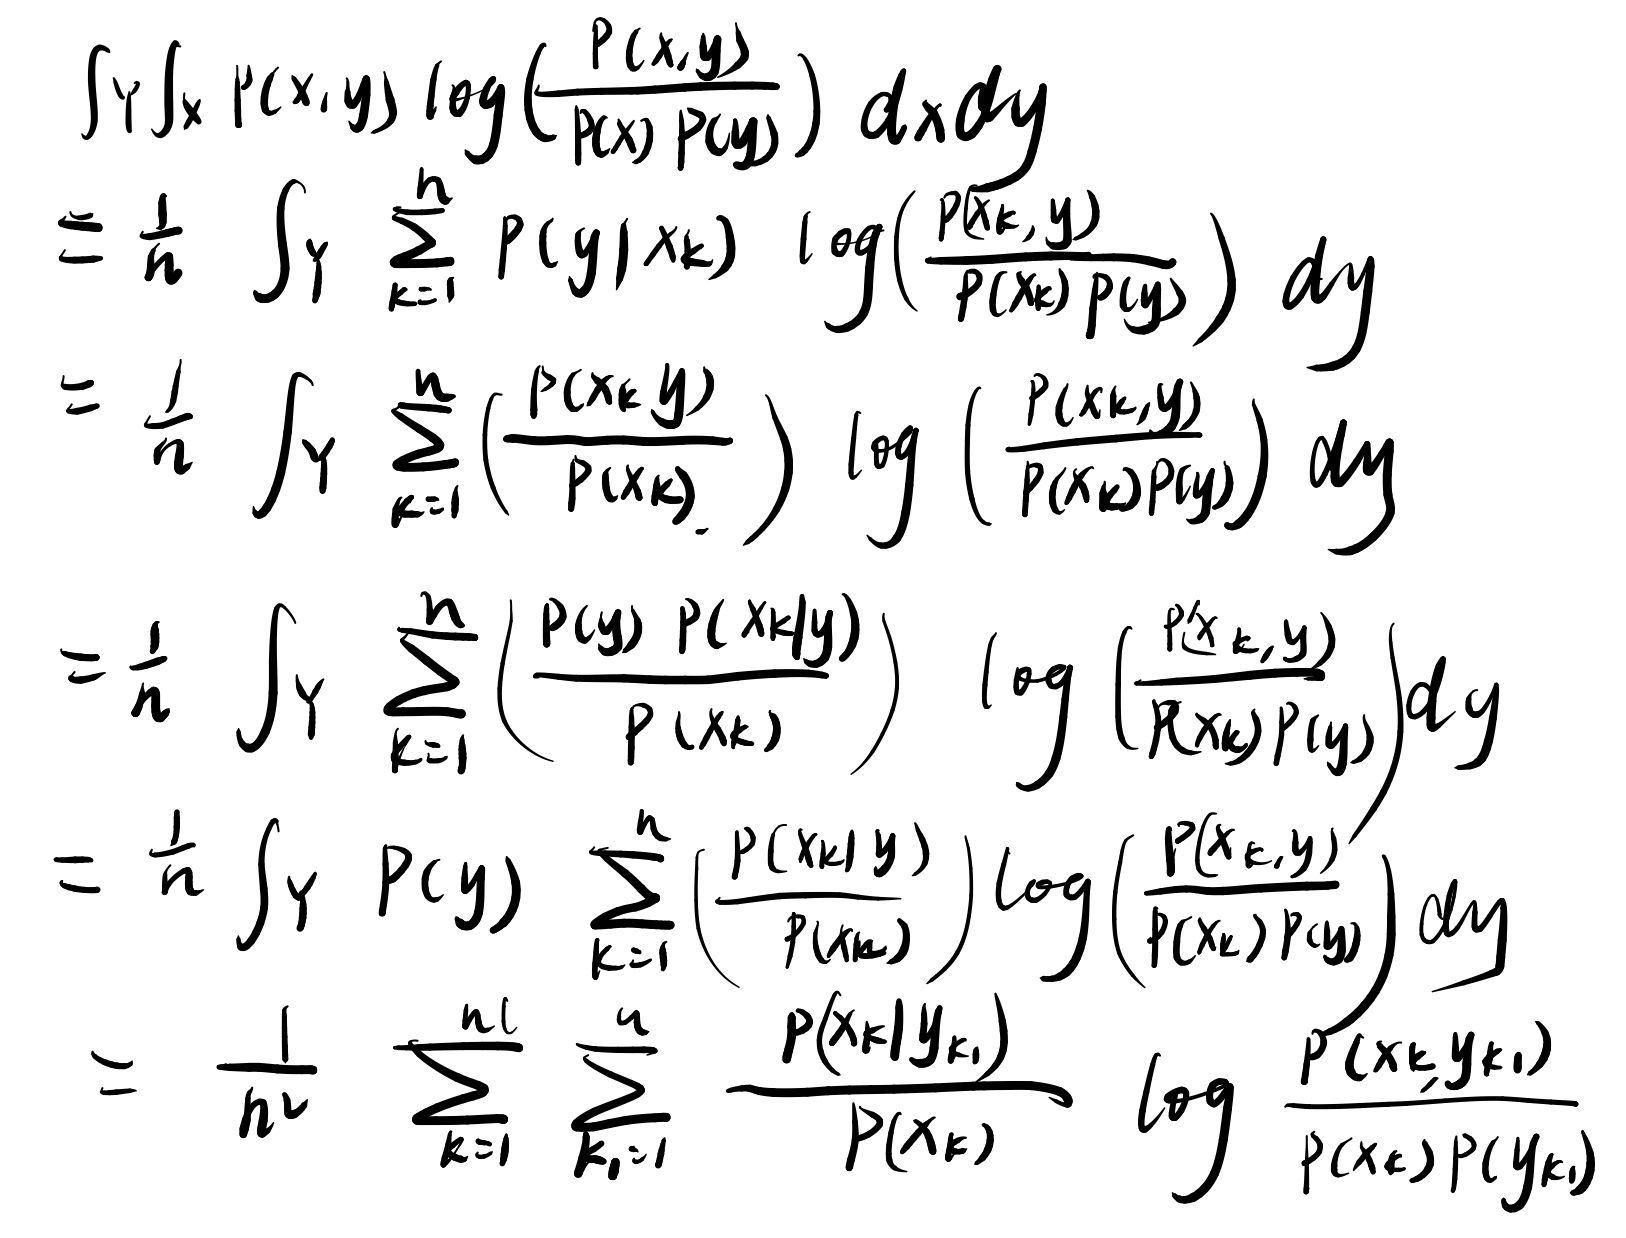

- 2:
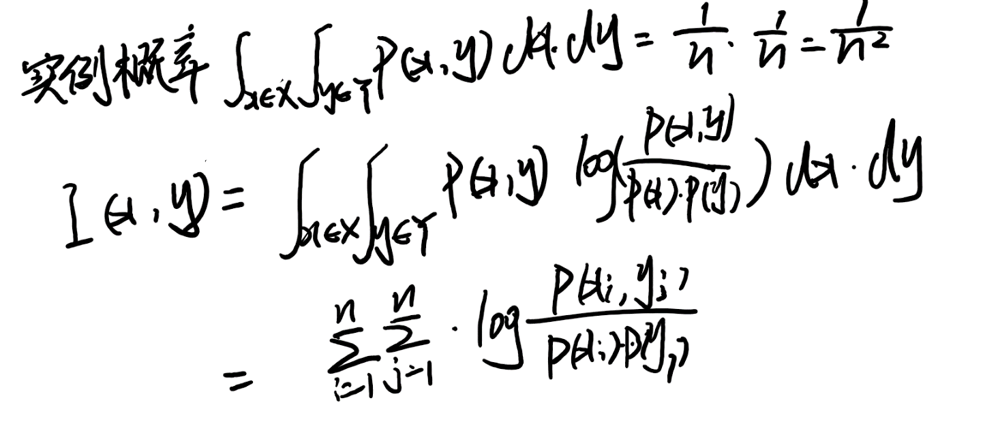

- 3:
**尝试的条件熵推导结果：**
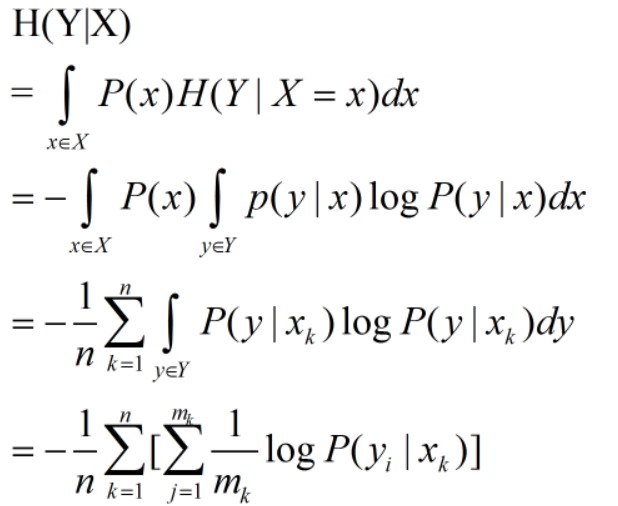

实验结果：得出的条件熵并不符合期望（应该是一个比单变量信息熵要小的数值），问题可能出在信息熵，或条件熵上

----

#### 尝试方法2.部分离散化：

顾名思义，在计算条件熵p(y|x)时，当作计算p(c|x)处理，即把特征y离散化作为标签处理：

实验结果：目前与熵值的大小关系符合定义，能够得出合法的SU数值，但正确性仍待考量

分析：

1）依照尽量减少信息损失的原则，这样的混用方法似乎可以理解，但是从理论上证明其合理性相当困难

2）一旦用到离散化，则需要考虑离散化方法问题，理由仍然是熵对离散化程度的敏感性

3）关于离散化程度的考量：最优离散化方法其实是一个np难问题，故去寻找一个最佳答案似乎并不明智，目前的想法是，将条件概率的数值控制在其有意义的区间内，即可以接受。理由是我们最后并不会直接把计算出的SU数值用作特征选择，而是用到其大小关系，这一点其实基本不会收到离散化程度的影响。



----


### 思维图：
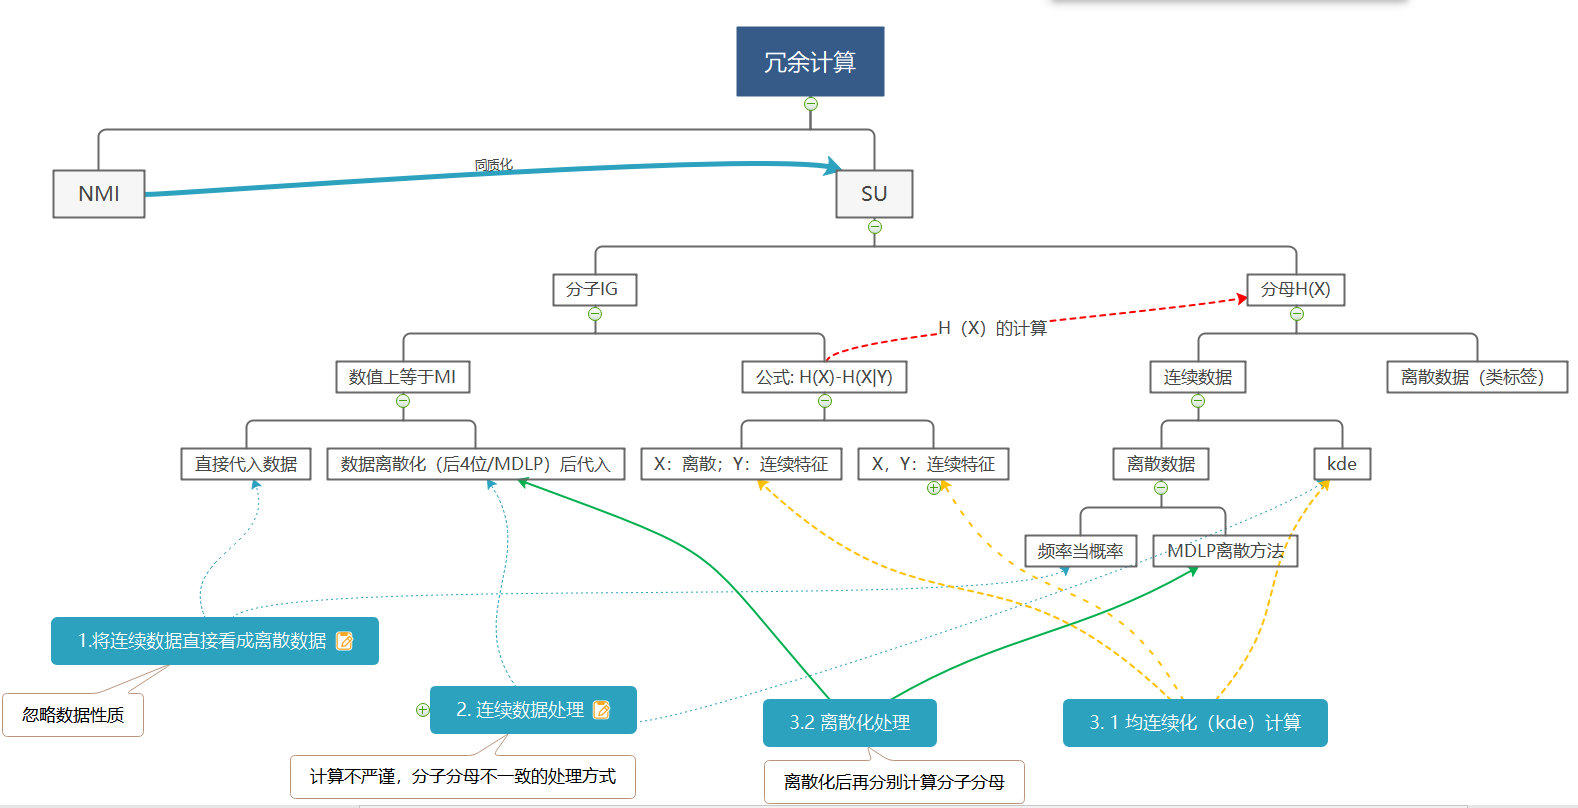